In [302]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [303]:
df = pd.read_csv(r'C:\Users\CVR\Downloads\inventory_data_noisy.csv')

In [304]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [305]:
df['Location'].mode()

0    New York
Name: Location, dtype: object

In [306]:
df['Consumption'] = df['Consumption'].fillna(df['Consumption'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [307]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles
...,...,...,...,...,...,...
18355,D001,P012,2022-02-19,71.0,15.0,Los Angeles
18356,D003,P014,2022-01-26,47.0,12.0,Los Angeles
18357,D001,P013,2022-02-14,89.0,8.0,Chicago
18358,D004,P017,2022-03-24,29.0,6.0,New York


In [308]:
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [309]:
df = df.drop_duplicates()

In [310]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.000000,8.000000,Chicago
1,D000,P000,2022-01-02,70.000000,9.000000,Chicago
2,D000,P000,2022-01-03,12.000000,17.000000,Los Angeles
3,D000,P000,2022-01-04,74.000000,13.000000,Los Angeles
4,D000,P000,2022-01-05,57.000000,10.000000,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.938526,New York
18264,D001,P010,2022-01-27,26.000000,18.000000,Chicago
18328,D001,P014,2022-01-14,30.000000,5.000000,Chicago
18337,D001,P013,2022-01-26,48.000000,15.000000,Chicago


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18011 non-null  object 
 1   Product_ID   18011 non-null  object 
 2   Date         18011 non-null  object 
 3   Quantity     18011 non-null  float64
 4   Consumption  18011 non-null  float64
 5   Location     18011 non-null  object 
dtypes: float64(2), object(4)
memory usage: 985.0+ KB


In [312]:
df.describe()

,Quantity,Consumption
count,18011.000000,18011.000000
mean,59.231732,12.952437
std,71.490048,13.394357
min,10.000000,5.000000
25%,32.000000,8.000000
50%,55.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


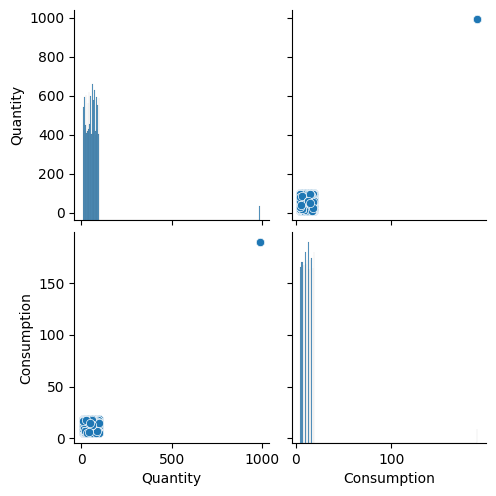

In [313]:
sns.pairplot(df)

In [314]:
df['Location'].unique()

array(['Chicago', 'Los Angeles', 'New York'], dtype=object)

<Axes: >

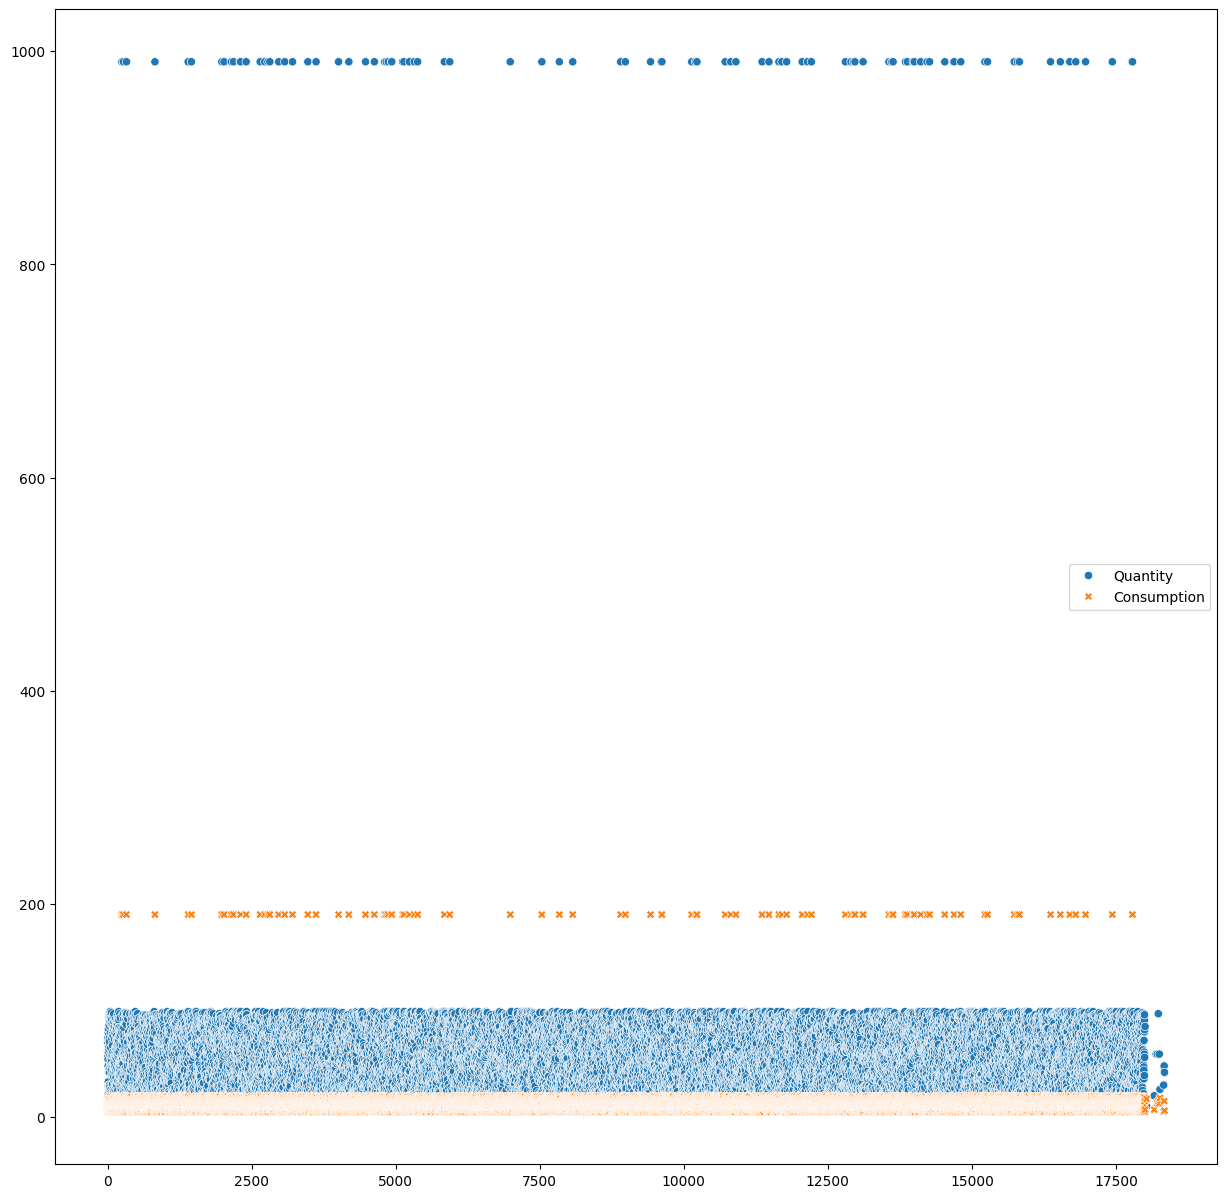

In [315]:
plt.figure(figsize=(15,15))
sns.scatterplot(df)

<Axes: xlabel='Quantity', ylabel='Count'>

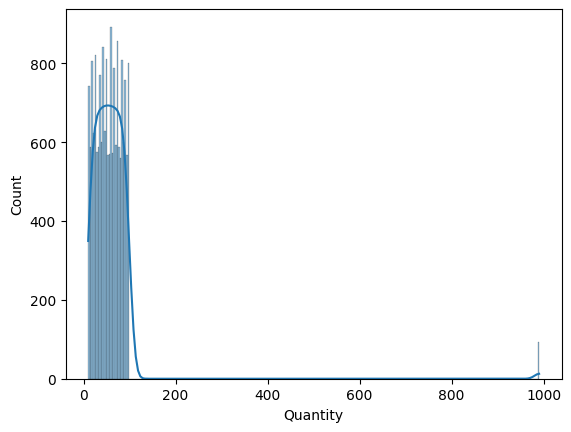

In [316]:
sns.histplot(df['Quantity'],kde=True)

<Axes: xlabel='Consumption', ylabel='Count'>

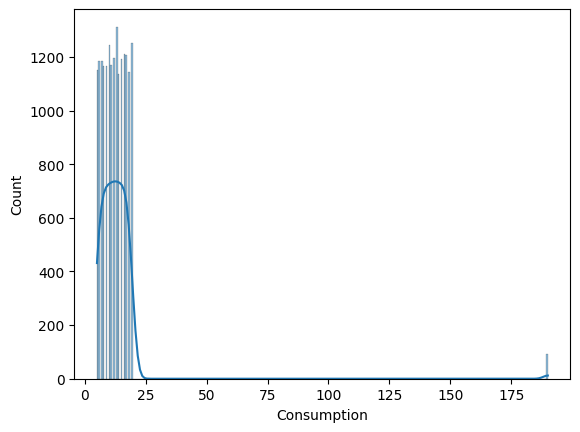

In [317]:
sns.histplot(df['Consumption'],kde=True)

In [318]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.000000,8.000000,Chicago
1,D000,P000,2022-01-02,70.000000,9.000000,Chicago
2,D000,P000,2022-01-03,12.000000,17.000000,Los Angeles
3,D000,P000,2022-01-04,74.000000,13.000000,Los Angeles
4,D000,P000,2022-01-05,57.000000,10.000000,Los Angeles
...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.938526,New York
18264,D001,P010,2022-01-27,26.000000,18.000000,Chicago
18328,D001,P014,2022-01-14,30.000000,5.000000,Chicago
18337,D001,P013,2022-01-26,48.000000,15.000000,Chicago


In [319]:
df.shape

(18011, 6)

In [320]:
df['Dealer_ID'].unique()

array(['D000', 'D001', 'D002', 'D003', 'D004', 'D005', 'D006', 'D007',
       'D008', 'D009'], dtype=object)

<Axes: ylabel='Quantity'>

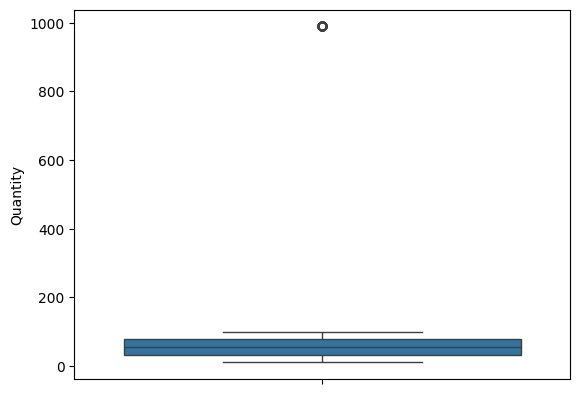

In [321]:
sns.boxplot(df['Quantity'])

<Axes: ylabel='Consumption'>

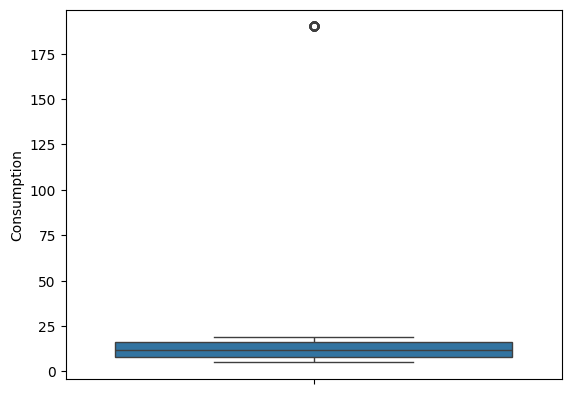

In [322]:
sns.boxplot(df['Consumption'])

In [323]:
df['Quantity'].std()

np.float64(71.4900480924377)

In [324]:
df['Consumption'].std()

np.float64(13.394357258381675)

In [325]:
from scipy.stats import zscore

In [326]:
df['zscore']=zscore(df['Quantity'])

C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\1032016636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore']=zscore(df['Quantity'])


In [327]:
df['outliers']= df['zscore'].apply(lambda x: 'outlier' if (x>3 or x<-3) else 'Normal')

C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\1402254611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outliers']= df['zscore'].apply(lambda x: 'outlier' if (x>3 or x<-3) else 'Normal')


<Axes: xlabel='Quantity', ylabel='Count'>

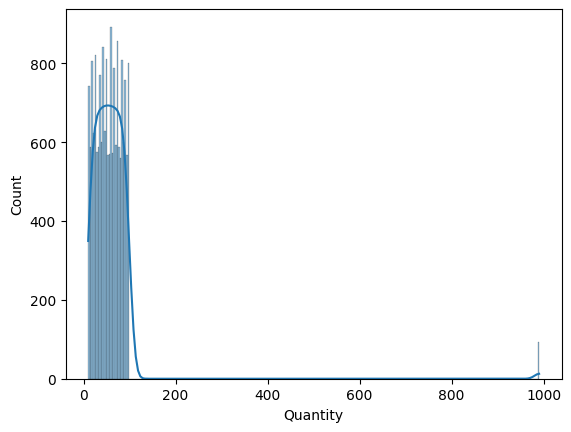

In [328]:
sns.histplot(df['Quantity'],kde=True)

In [329]:
df['outliers'].unique()

array(['Normal', 'outlier'], dtype=object)

In [330]:
def quantileOutliers(df,column):
    q1 = df[column].quantile(0.25)
    print(f"q1:{q1}")
    q3 = df[column].quantile(0.75)
    print(f"q3:{q3}")
    iqr = q3-q1
    print(f"iqr:{iqr}")
    lower_bound = q1 - (1.5 * iqr)
    print(f"lower Bound:{lower_bound}")
    upper_bound = q3 + (1.5 * iqr)
    print(f"upper Bound:{upper_bound}")
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

In [331]:
quantileOutliers(df,'Quantity')

q1:32.0
q3:77.0
iqr:45.0
lower Bound:-35.5
upper Bound:144.5


,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,zscore,outliers
247,D000,P002,2022-03-08,990.0,190.0,New York,13.019912,outlier
273,D000,P003,2022-01-04,990.0,190.0,New York,13.019912,outlier
326,D000,P003,2022-02-27,990.0,190.0,New York,13.019912,outlier
820,D000,P009,2022-01-11,990.0,190.0,New York,13.019912,outlier
1397,D000,P015,2022-02-18,990.0,190.0,New York,13.019912,outlier
...,...,...,...,...,...,...,...,...
16803,D009,P006,2022-03-04,990.0,190.0,New York,13.019912,outlier
16973,D009,P008,2022-02-24,990.0,190.0,New York,13.019912,outlier
17437,D009,P013,2022-03-08,990.0,190.0,New York,13.019912,outlier
17777,D009,P017,2022-02-18,990.0,190.0,New York,13.019912,outlier


In [332]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,zscore,outliers
0,D000,P000,2022-01-01,62.000000,8.000000,Chicago,0.038723,Normal
1,D000,P000,2022-01-02,70.000000,9.000000,Chicago,0.150630,Normal
2,D000,P000,2022-01-03,12.000000,17.000000,Los Angeles,-0.660694,Normal
3,D000,P000,2022-01-04,74.000000,13.000000,Los Angeles,0.206584,Normal
4,D000,P000,2022-01-05,57.000000,10.000000,Los Angeles,-0.031218,Normal
...,...,...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.938526,New York,-0.001763,Normal
18264,D001,P010,2022-01-27,26.000000,18.000000,Chicago,-0.464857,Normal
18328,D001,P014,2022-01-14,30.000000,5.000000,Chicago,-0.408904,Normal
18337,D001,P013,2022-01-26,48.000000,15.000000,Chicago,-0.157113,Normal


In [333]:
df['outliers'].unique()

array(['Normal', 'outlier'], dtype=object)

In [334]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,zscore,outliers
0,D000,P000,2022-01-01,62.000000,8.000000,Chicago,0.038723,Normal
1,D000,P000,2022-01-02,70.000000,9.000000,Chicago,0.150630,Normal
2,D000,P000,2022-01-03,12.000000,17.000000,Los Angeles,-0.660694,Normal
3,D000,P000,2022-01-04,74.000000,13.000000,Los Angeles,0.206584,Normal
4,D000,P000,2022-01-05,57.000000,10.000000,Los Angeles,-0.031218,Normal
...,...,...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.938526,New York,-0.001763,Normal
18264,D001,P010,2022-01-27,26.000000,18.000000,Chicago,-0.464857,Normal
18328,D001,P014,2022-01-14,30.000000,5.000000,Chicago,-0.408904,Normal
18337,D001,P013,2022-01-26,48.000000,15.000000,Chicago,-0.157113,Normal


In [335]:
quantileOutliers(df,'Consumption')

q1:8.0
q3:16.0
iqr:8.0
lower Bound:-4.0
upper Bound:28.0


,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,zscore,outliers
247,D000,P002,2022-03-08,990.0,190.0,New York,13.019912,outlier
273,D000,P003,2022-01-04,990.0,190.0,New York,13.019912,outlier
326,D000,P003,2022-02-27,990.0,190.0,New York,13.019912,outlier
820,D000,P009,2022-01-11,990.0,190.0,New York,13.019912,outlier
1397,D000,P015,2022-02-18,990.0,190.0,New York,13.019912,outlier
...,...,...,...,...,...,...,...,...
16803,D009,P006,2022-03-04,990.0,190.0,New York,13.019912,outlier
16973,D009,P008,2022-02-24,990.0,190.0,New York,13.019912,outlier
17437,D009,P013,2022-03-08,990.0,190.0,New York,13.019912,outlier
17777,D009,P017,2022-02-18,990.0,190.0,New York,13.019912,outlier


In [336]:
df = df[df['outliers']!='outlier']

In [337]:
df['outliers'].unique()


array(['Normal'], dtype=object)

<Axes: xlabel='Quantity', ylabel='Count'>

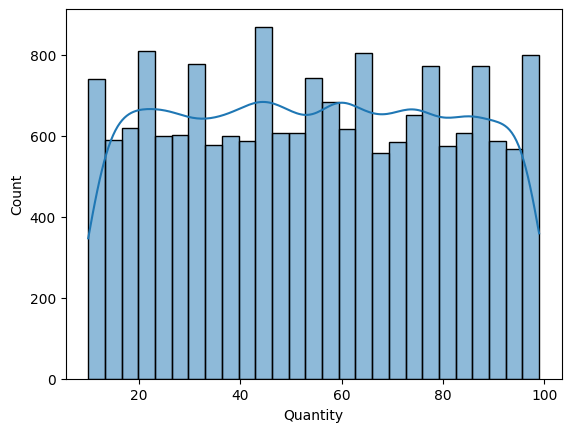

In [338]:
sns.histplot(df['Quantity'],kde=True)

<Axes: xlabel='Consumption', ylabel='Count'>

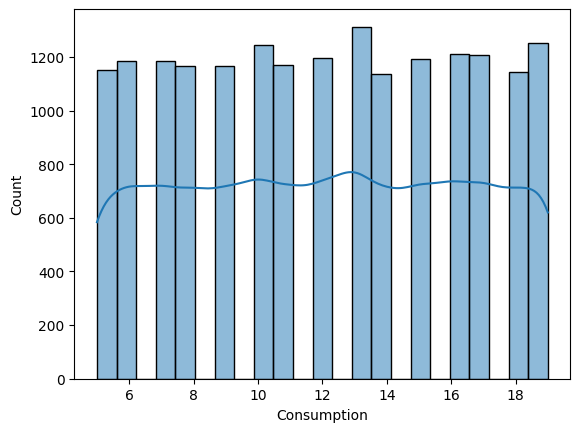

In [339]:
sns.histplot(df['Consumption'],kde=True)

<Axes: xlabel='zscore', ylabel='Count'>

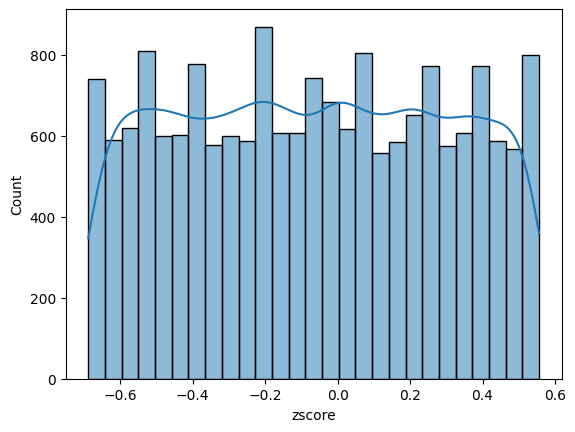

In [340]:
sns.histplot(df['zscore'],kde=True)

In [341]:
df['quantity_consumption_ratio'] = round(df['Quantity']/df['Consumption'],2)

C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\1960586743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity_consumption_ratio'] = round(df['Quantity']/df['Consumption'],2)


<Axes: ylabel='quantity_consumption_ratio'>

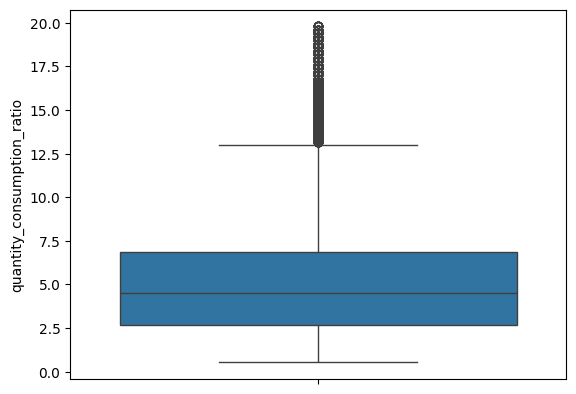

In [342]:
sns.boxplot(df['quantity_consumption_ratio'])

In [343]:
quantity_outliers=quantileOutliers(df,'quantity_consumption_ratio')

q1:2.67
q3:6.83
iqr:4.16
lower Bound:-3.5700000000000003
upper Bound:13.07


In [347]:
def quantile_no_outliers(df, column):
    q1 = df[column].quantile(0.25)
    print(f"q1: {q1}")
    q3 = df[column].quantile(0.75)
    print(f"q3: {q3}")
    iqr = q3 - q1
    print(f"iqr: {iqr}")
    lower_bound = q1 - (1.5 * iqr)
    print(f"lower Bound: {lower_bound}")
    upper_bound = q3 + (1.5 * iqr)
    print(f"upper Bound: {upper_bound}")

    no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return no_outliers


In [349]:
df=quantile_no_outliers(df,'quantity_consumption_ratio')

q1: 2.67
q3: 6.83
iqr: 4.16
lower Bound: -3.5700000000000003
upper Bound: 13.07


In [350]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,zscore,outliers,quantity_consumption_ratio
0,D000,P000,2022-01-01,62.000000,8.000000,Chicago,0.038723,Normal,7.75
1,D000,P000,2022-01-02,70.000000,9.000000,Chicago,0.150630,Normal,7.78
2,D000,P000,2022-01-03,12.000000,17.000000,Los Angeles,-0.660694,Normal,0.71
3,D000,P000,2022-01-04,74.000000,13.000000,Los Angeles,0.206584,Normal,5.69
4,D000,P000,2022-01-05,57.000000,10.000000,Los Angeles,-0.031218,Normal,5.70
...,...,...,...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.938526,New York,-0.001763,Normal,4.57
18264,D001,P010,2022-01-27,26.000000,18.000000,Chicago,-0.464857,Normal,1.44
18328,D001,P014,2022-01-14,30.000000,5.000000,Chicago,-0.408904,Normal,6.00
18337,D001,P013,2022-01-26,48.000000,15.000000,Chicago,-0.157113,Normal,3.20


In [351]:
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [352]:
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\3663745347.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)


In [353]:
df

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,zscore,outliers,quantity_consumption_ratio,Consumption_Level
0,D000,P000,2022-01-01,62.000000,8.000000,Chicago,0.038723,Normal,7.75,Low
1,D000,P000,2022-01-02,70.000000,9.000000,Chicago,0.150630,Normal,7.78,Low
2,D000,P000,2022-01-03,12.000000,17.000000,Los Angeles,-0.660694,Normal,0.71,High
3,D000,P000,2022-01-04,74.000000,13.000000,Los Angeles,0.206584,Normal,5.69,Medium
4,D000,P000,2022-01-05,57.000000,10.000000,Los Angeles,-0.031218,Normal,5.70,Low
...,...,...,...,...,...,...,...,...,...,...
18253,D008,P013,2022-02-29,59.105704,12.938526,New York,-0.001763,Normal,4.57,Medium
18264,D001,P010,2022-01-27,26.000000,18.000000,Chicago,-0.464857,Normal,1.44,High
18328,D001,P014,2022-01-14,30.000000,5.000000,Chicago,-0.408904,Normal,6.00,Low
18337,D001,P013,2022-01-26,48.000000,15.000000,Chicago,-0.157113,Normal,3.20,Medium


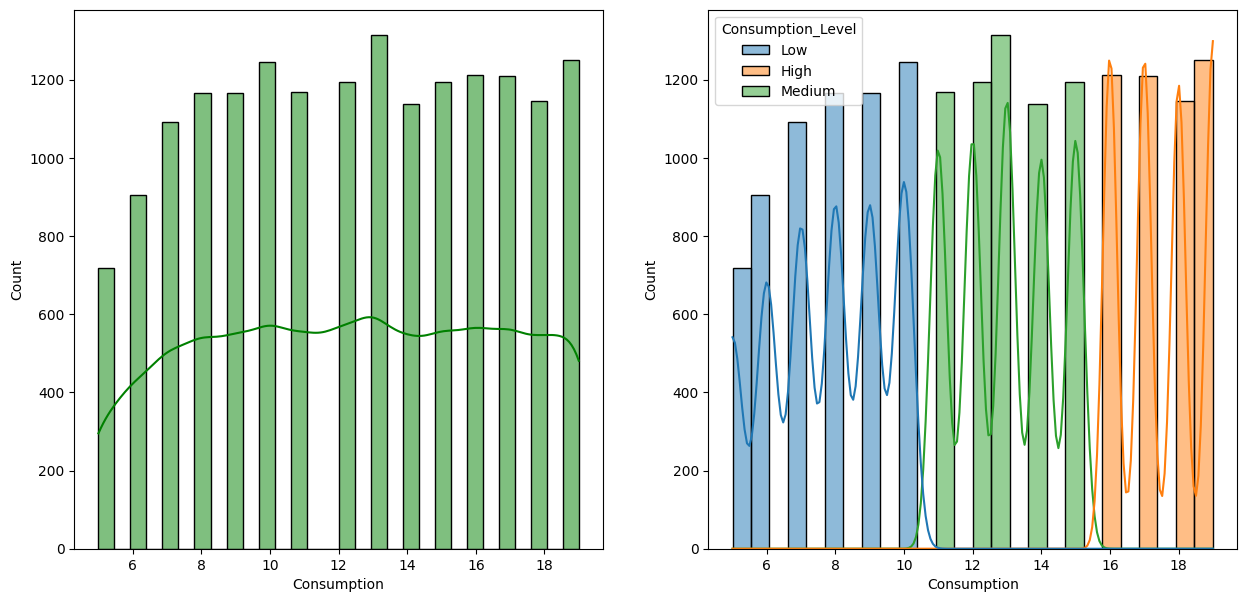

In [354]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

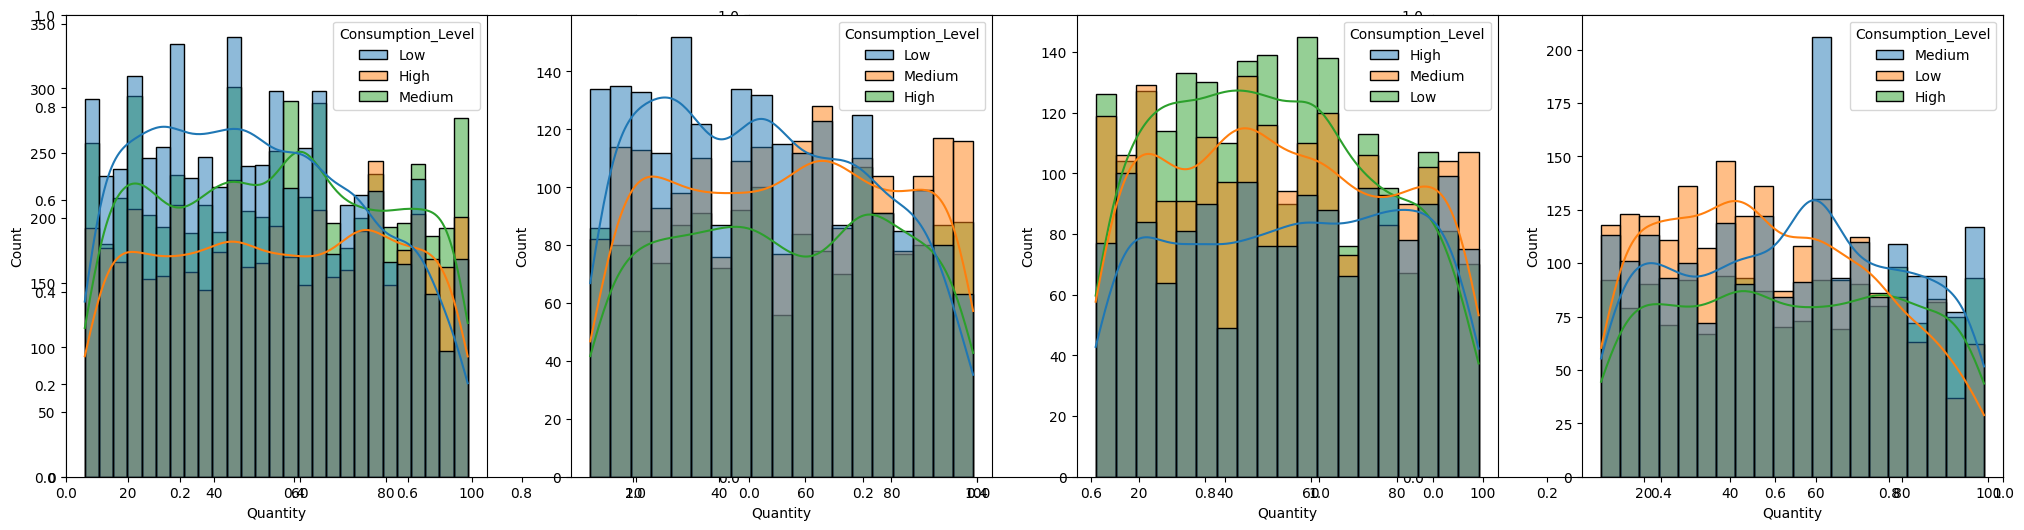

In [355]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\1092054484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Product_ID'], palette = 'Blues')


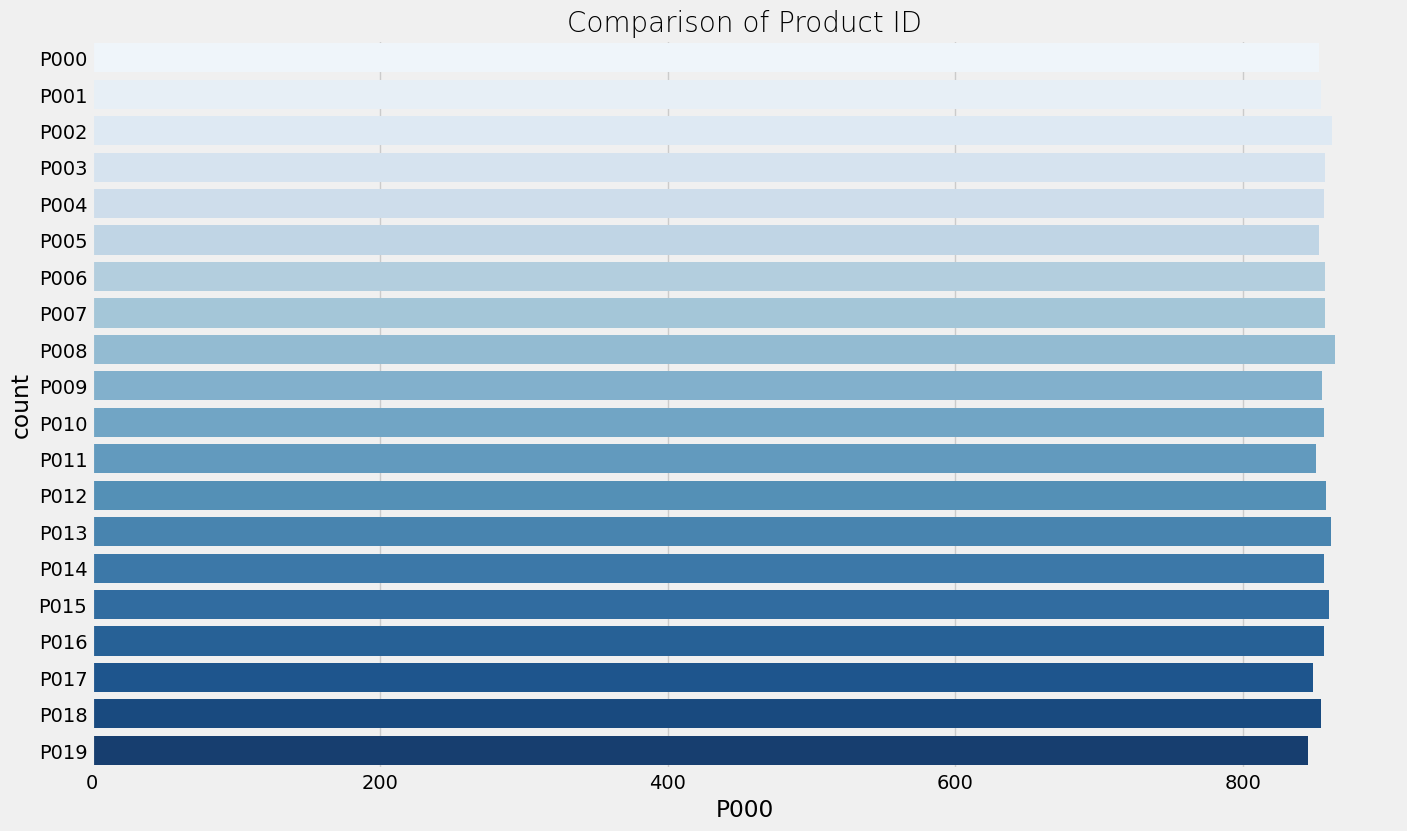

In [356]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

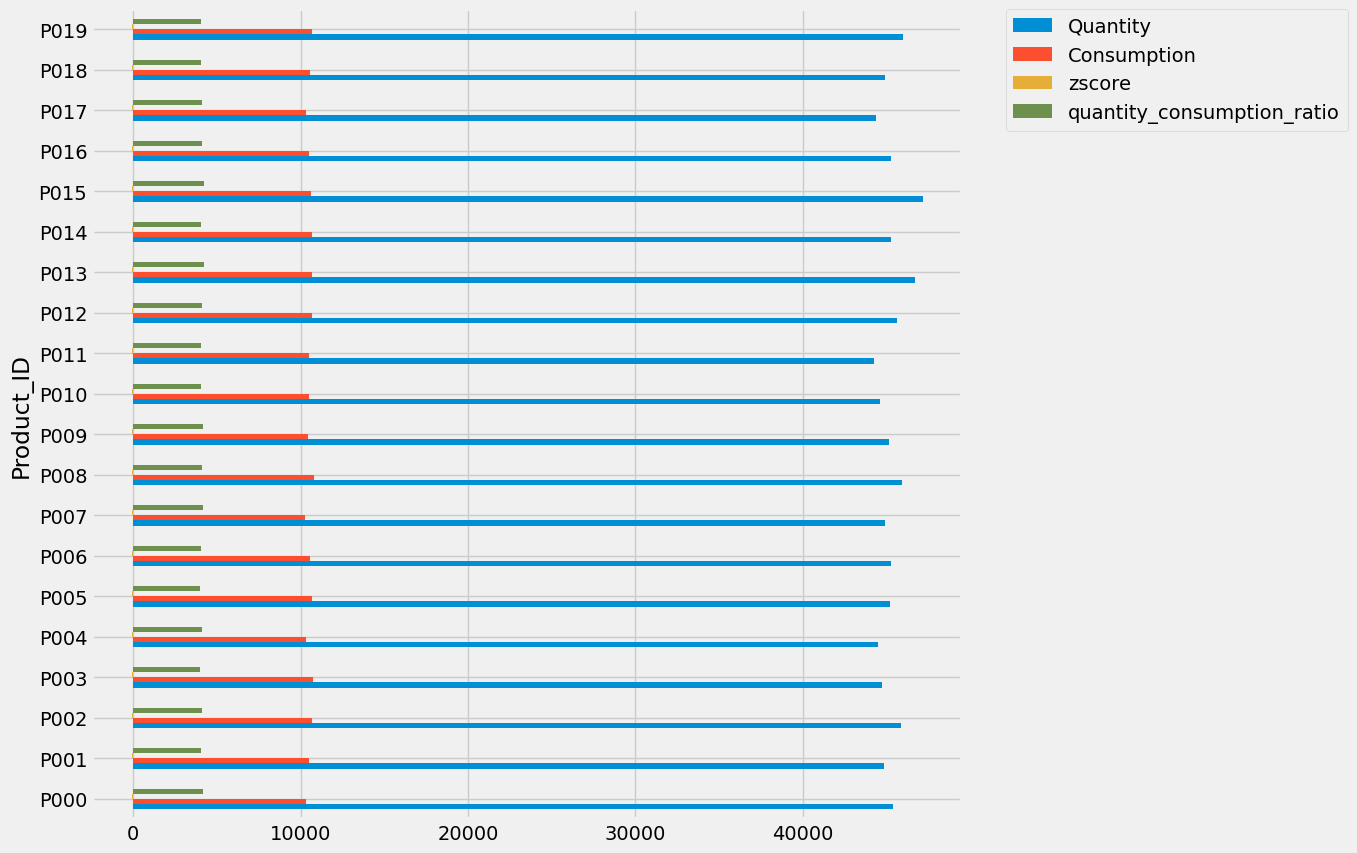

In [357]:
df.groupby('Product_ID').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [358]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,zscore,outliers,quantity_consumption_ratio,Consumption_Level
0,D000,P000,2022-01-01,62.0,8.0,Chicago,0.038723,Normal,7.75,Low
1,D000,P000,2022-01-02,70.0,9.0,Chicago,0.150630,Normal,7.78,Low
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,-0.660694,Normal,0.71,High
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,0.206584,Normal,5.69,Medium
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,-0.031218,Normal,5.70,Low


In [360]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df['Dealer_ID'] = label_encoder.fit_transform(df['Dealer_ID'])
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Consumption_Level'] = label_encoder.fit_transform(df['Consumption_Level'])

C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\479137866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dealer_ID'] = label_encoder.fit_transform(df['Dealer_ID'])
C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\479137866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])
C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\479137866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [361]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Quantity'] = scaler.fit_transform(df[['Quantity']]) 
df['Consumption'] = scaler.fit_transform(df[['Consumption']])

C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\3821237657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = scaler.fit_transform(df[['Quantity']])
C:\Users\CVR\AppData\Local\Temp\ipykernel_9536\3821237657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumption'] = scaler.fit_transform(df[['Consumption']])


In [362]:

df = df.drop('Date',axis=1)


In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [364]:
df

,Dealer_ID,Product_ID,Quantity,Consumption,Location,zscore,outliers,quantity_consumption_ratio,Consumption_Level
0,0,0,0.356612,-1.043780,0,0.038723,Normal,7.75,1
1,0,0,0.672018,-0.803697,0,0.150630,Normal,7.78,1
2,0,0,-1.614680,1.116971,1,-0.660694,Normal,0.71,0
3,0,0,0.829722,0.156637,1,0.206584,Normal,5.69,2
4,0,0,0.159482,-0.563613,1,-0.031218,Normal,5.70,1
...,...,...,...,...,...,...,...,...,...
18253,8,13,0.242502,0.141878,2,-0.001763,Normal,4.57,2
18264,1,10,-1.062718,1.357054,0,-0.464857,Normal,1.44,0
18328,1,14,-0.905015,-1.764030,0,-0.408904,Normal,6.00,1
18337,1,13,-0.195350,0.636804,0,-0.157113,Normal,3.20,2


In [373]:
x = df.drop(['zscore','outliers','quantity_consumption_ratio','Consumption_Level'],axis=1)

In [374]:
y = df['Consumption_Level']

In [375]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [376]:
clf = LogisticRegression(max_iter=10000, random_state=0)


In [377]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [378]:
acc = accuracy_score(y_test, clf.predict(X_test)) * 100


In [379]:
acc

100.0

In [380]:
print(f"Logistic Regression model accuracy: {acc:.2f}%")


Logistic Regression model accuracy: 100.00%


In [381]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


In [382]:
y_pred = clf.predict(X_test)


<Axes: >

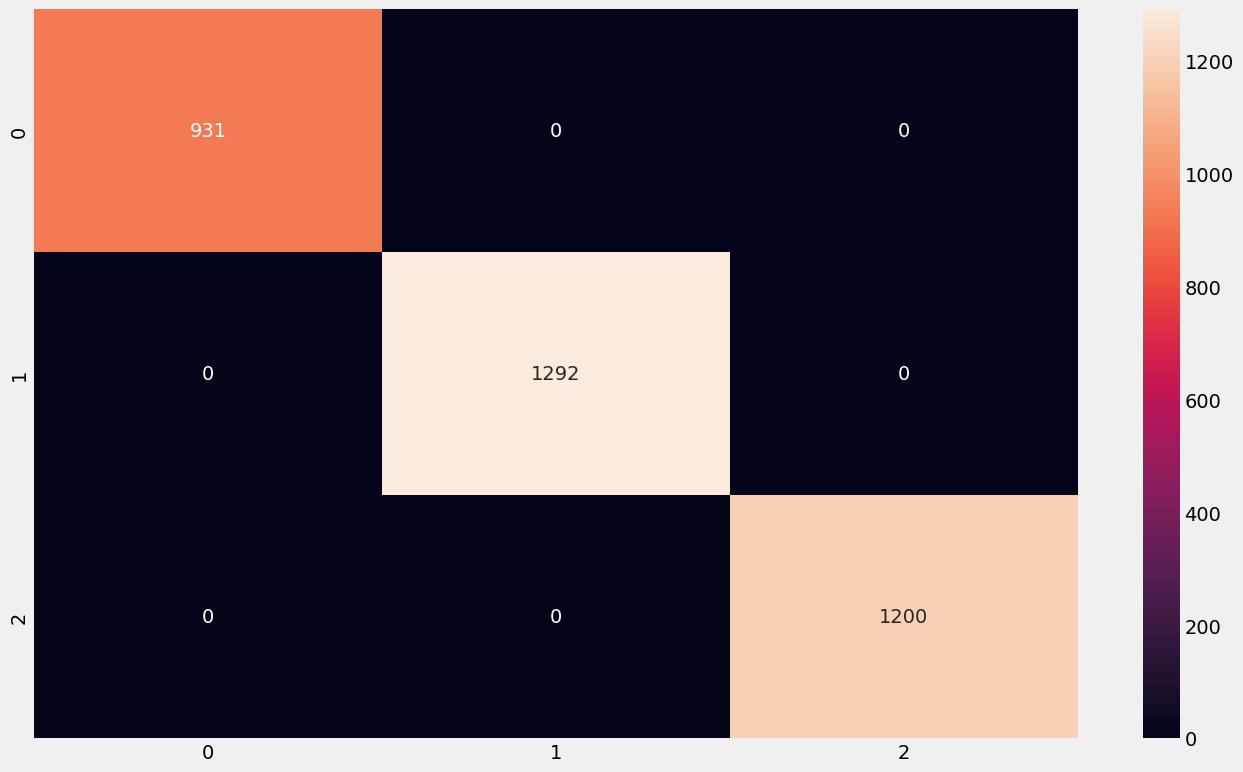

In [394]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix,annot=True,fmt='d')

In [395]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       1.00      1.00      1.00      1292
           2       1.00      1.00      1.00      1200

    accuracy                           1.00      3423
   macro avg       1.00      1.00      1.00      3423
weighted avg       1.00      1.00      1.00      3423



In [396]:
if len(set(y)) == 2: 
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"\nROC-AUC Score: {auc_score:.2f}")

In [397]:
import joblib

joblib.dump(label_encoder, "label_encoder.pkl")

joblib.dump(scaler, "scaler.pkl")

joblib.dump(clf, "logistic_model.pkl")

joblib.dump(X_train.columns.tolist(), "X_train_columns.pkl")

print("All objects saved successfully!")

All objects saved successfully!


In [398]:
new_data = pd.DataFrame({
    'Dealer_ID': ['D003'],
    'Product_ID': ['P010'],
     'Quantity': [50],
    'Consumption': [9], 
    'Location': ['Chicago']
   
})

for col in ['Dealer_ID', 'Product_ID', 'Location']:
    if new_data[col][0] in label_encoder.classes_:
        new_data[col] = label_encoder.fit_transform(new_data[col])
    else:
        new_data[col] = -1

new_data['Quantity'] = scaler.fit_transform(new_data[['Quantity']])  
new_data['Consumption'] = scaler.fit_transform(new_data[['Consumption']])

X_new = new_data[X_train.columns]  


X_new_scaled = pd.DataFrame(X_new, columns=X_train.columns)

predicted_class = clf.predict(X_new_scaled)
predicted_proba = clf.predict_proba(X_new_scaled)

print(f"Predicted Consumption Level: {predicted_class[0]}")
print(f"Prediction Probabilities: {predicted_proba}")


Predicted Consumption Level: 2
Prediction Probabilities: [[2.94630243e-07 1.24202243e-04 9.99875503e-01]]


In [ ]:
df['Dealer_ID']

<Axes: ylabel='Dealer_ID'>

Error in callback <function flush_figures at 0x000002A9A4CD55A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 